# 9.3. Modelos de Linguagem



# 9.3.1.1. Modelos de Markov e n-gramas

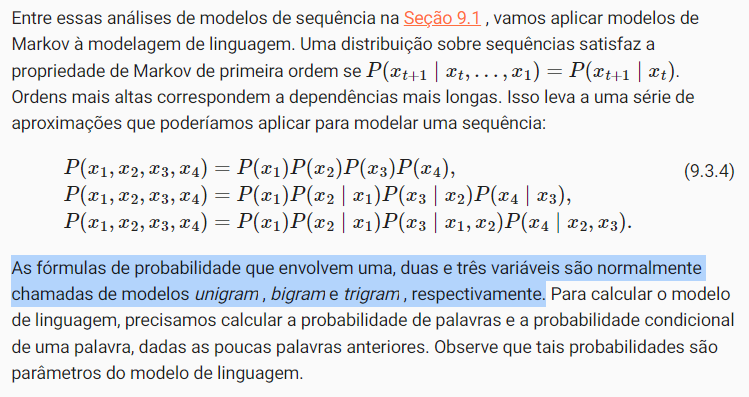

# 9.3.1.2. Frequência de palavras

Por exemplo, __a estimativa P(deep) pode ser calculado como a probabilidade de qualquer frase começar com a palavra “deep”.__ 

 Infelizmente, estimar a probabilidade de um par de palavras é um pouco mais difícil, já que as ocorrências de “aprendizado profundo” são muito menos frequentes. As coisas pioram para combinações de três palavras e além.

 A menos que forneçamos alguma solução para atribuir a essas combinações de palavras uma contagem diferente de zero, não seremos capazes de usá-las em um modelo de linguagem. Se o conjunto de dados for pequeno ou se as palavras forem muito raras, podemos não encontrar nem mesmo uma única delas.

 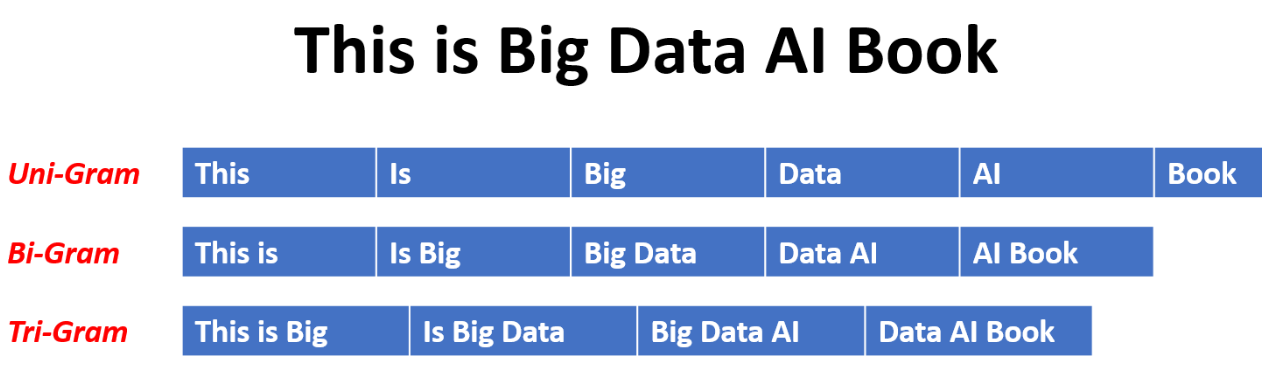

# 9.3.2. Perplexidade

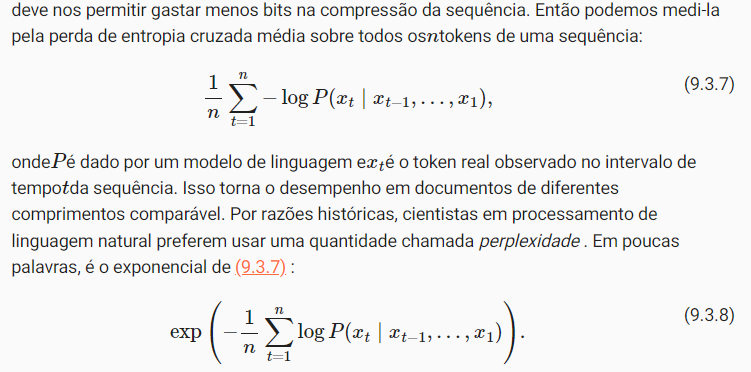

Perplexidade pode ser melhor entendida como o recíproco da média geométrica do número de escolhas reais que temos ao decidir qual ficha escolher em seguida. Vamos dar uma olhada em alguns casos:

- No melhor cenário, o modelo sempre estima perfeitamente a probabilidade do token alvo como 1. Nesse caso, a perplexidade do modelo é 1.

- No pior cenário, o modelo sempre prevê a probabilidade do token alvo como 0. Nessa situação, a perplexidade é infinito positivo.

- Na linha de base, o modelo prevê uma distribuição uniforme sobre todos os tokens disponíveis do vocabulário. Nesse caso, a perplexidade é igual ao número de tokens únicos do vocabulário. Na verdade, se armazenássemos a sequência sem nenhuma compressão, isso seria o melhor que poderíamos fazer para codificá-la. Portanto, isso fornece um limite superior não trivial que qualquer modelo útil deve superar.

# 9.3.3. Sequências de particionamento

Projetaremos modelos de linguagem usando redes neurais e usaremos perplexidade para avaliar quão bom o modelo é em prever o próximo token dado o conjunto atual de tokens em sequências de texto.

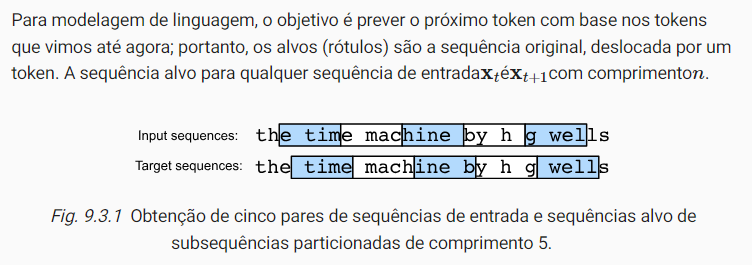

A Fig. 9.3.1 mostra um exemplo de obtenção de cinco pares de sequências de entrada e sequências alvo com n=5 e d=2.

In [2]:
import torch
from d2l import torch as d2l

In [3]:
@d2l.add_to_class(d2l.TimeMachine)  #@save
def __init__(self, batch_size, num_steps, num_train=10000, num_val=5000):
    super(d2l.TimeMachine, self).__init__()
    self.save_hyperparameters()
    corpus, self.vocab = self.build(self._download())
    array = torch.tensor([corpus[i:i+num_steps+1]
                        for i in range(len(corpus)-num_steps)])
    self.X, self.Y = array[:,:-1], array[:,1:]

Para treinar modelos de linguagem, amostraremos aleatoriamente pares de sequências de entrada e sequências de destino em minibatches. O carregador de dados a seguir gera aleatoriamente um minibatch do conjunto de dados a cada vez. 

- O argumento __batch_size__ especifica o número de exemplos de subsequência em cada minibatch e
- __num_steps__ é o comprimento da subsequência em tokens.

In [4]:
@d2l.add_to_class(d2l.TimeMachine)  #@save
def get_dataloader(self, train):
    idx = slice(0, self.num_train) if train else slice(
        self.num_train, self.num_train + self.num_val)
    return self.get_tensorloader([self.X, self.Y], train, idx)

Como podemos ver a seguir, um minibatch de sequências alvo pode ser obtido deslocando as sequências de entrada em um token.

In [6]:
data = d2l.TimeMachine(batch_size=2, num_steps=10)
for X, Y in data.train_dataloader():
    print('X:', X, '\nY:', Y)
    break

X: tensor([[ 0, 10, 20,  0, 16, 15, 13, 26,  0,  2],
        [22, 17,  0,  2, 15,  5,  0,  5, 16, 24]]) 
Y: tensor([[10, 20,  0, 16, 15, 13, 26,  0,  2,  0],
        [17,  0,  2, 15,  5,  0,  5, 16, 24, 15]])


# 9.3.4. Resumo e Discussão

Os modelos de linguagem estimam a probabilidade conjunta de uma sequência de texto. Para sequências longas,
n-grams fornecem um modelo conveniente ao truncar a dependência. No entanto, há muita estrutura, mas não frequência suficiente para lidar eficientemente com combinações de palavras pouco frequentes por meio da suavização de Laplace. Portanto, focaremos na modelagem de linguagem neural nas seções subsequentes. Para treinar modelos de linguagem, podemos amostrar aleatoriamente pares de sequências de entrada e sequências de destino em minibatches. Após o treinamento, usaremos a perplexidade para medir a qualidade do modelo de linguagem.

Modelos de linguagem podem ser ampliados com aumento no tamanho dos dados, tamanho do modelo e quantidade em computação de treinamento. Grandes modelos de linguagem podem executar tarefas desejadas prevendo texto de saída dadas instruções de texto de entrada. Como discutiremos mais tarde (por exemplo, Seção 11.9 ), no momento presente grandes modelos de linguagem formam a base de sistemas de última geração em diversas tarefas.

# Código Agrupado

In [7]:
import torch
from d2l import torch as d2l


@d2l.add_to_class(d2l.TimeMachine)  #@save
def __init__(self, batch_size, num_steps, num_train=10000, num_val=5000):
    super(d2l.TimeMachine, self).__init__()
    self.save_hyperparameters()
    corpus, self.vocab = self.build(self._download())
    array = torch.tensor([corpus[i:i+num_steps+1]
                        for i in range(len(corpus)-num_steps)])
    self.X, self.Y = array[:,:-1], array[:,1:]


@d2l.add_to_class(d2l.TimeMachine)  #@save
def get_dataloader(self, train):
    idx = slice(0, self.num_train) if train else slice(
        self.num_train, self.num_train + self.num_val)
    return self.get_tensorloader([self.X, self.Y], train, idx)


data = d2l.TimeMachine(batch_size=2, num_steps=10)
for X, Y in data.train_dataloader():
    print('X:', X, '\nY:', Y)
    break

X: tensor([[21,  9,  2, 21,  0,  5, 16,  6, 20,  0],
        [ 0, 22, 20,  0, 21,  9,  6, 19,  6,  0]]) 
Y: tensor([[ 9,  2, 21,  0,  5, 16,  6, 20,  0, 15],
        [22, 20,  0, 21,  9,  6, 19,  6,  0, 15]])


# 9.3.5. Exercícios

# Ex.1 - Suponha que haja 100.000 palavras no conjunto de dados de treinamento. Quanta frequência de palavras e frequência adjacente de várias palavras um four-gram precisa armazenar?

words = 70606

indices: [0, 21, 9, 6, 0, 17, 19, 16, 11, 6]
words: [' ', 't', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e']


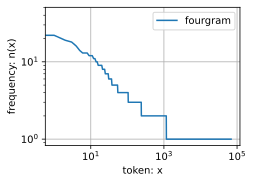

In [11]:
import collections
import random
import re
import torch
from d2l import torch as d2l

# ---------------------------------------------------------------------------------------------

# https://d2l-data.s3-accelerate.amazonaws.com/timemachine.txt
# https://www.gutenberg.org/ebooks/35
class TimeMachine(d2l.DataModule):  # @save
    """The Project Gutenberg eBook of Opúsculos por Alexandre Herculano - Tomo 02"""

    def _download(self):
        fname = d2l.download('https://www.gutenberg.org/cache/epub/16922/pg16922.txt', self.root)
        with open(fname, 'r', encoding='utf-8') as f:    # é preciso especificar a codificação UTF-8
            return f.read()


# # PARA LINK CODIFICADO EM 'UTF-8':
#     def _download(self):
#         fname = d2l.download('https://www.gutenberg.org/files/35/35-0.txt', self.root)
#         with open(fname, 'r', encoding='utf-8') as f:    # é preciso especificar a codificação UTF-8
#             return f.read()





data = TimeMachine()
raw_text = data._download()
raw_text[:80]                    # Livro

# ---------------------------------------------------------------------------------------------

@d2l.add_to_class(TimeMachine)  #@save
def _preprocess(self, text):
    return re.sub('[^A-Za-z]+', ' ', text).lower()

text = data._preprocess(raw_text)
text[:60]

# ---------------------------------------------------------------------------------------------

@d2l.add_to_class(TimeMachine)  #@save
def _tokenize(self, text):
    return list(text)

tokens = data._tokenize(text)
','.join(tokens[:30])

# ---------------------------------------------------------------------------------------------

class Vocab:  #@save
    """Vocabulary for text."""
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        # Flatten a 2D list if needed
        if tokens and isinstance(tokens[0], list):
            tokens = [token for line in tokens for token in line]
        
        # Count token frequencies
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                  reverse=True)
        
        # The list of unique tokens
        self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
            token for token, freq in self.token_freqs if freq >= min_freq])))
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
            return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]

    @property
    def unk(self):  # Index for the unknown token
        return self.token_to_idx['<unk>']

# ---------------------------------------------------------------------------------------------

vocab = Vocab(tokens)              # objjeto vocab da classe Vocab
indices = vocab[tokens[:10]]
print('indices:', indices)
print('words:', vocab.to_tokens(indices))

# ' '(espaço) tem índice 0, 'a' tem índice 1, 'b' tem índice 2, etc.

# ---------------------------------------------------------------------------------------------

@d2l.add_to_class(TimeMachine)  #@save
def build(self, raw_text, vocab=None):
    tokens = self._tokenize(self._preprocess(raw_text))
    if vocab is None: vocab = Vocab(tokens)
    corpus = [vocab[token] for token in tokens]
    return corpus, vocab

corpus, vocab = data.build(raw_text)
len(corpus), len(vocab)

# ---------------------------------------------------------------------------------------------

words = text.split()    # separação de strings
vocab = Vocab(words)    # faz a indexação
vocab.token_freqs[:10]  # Count token frequencies: 10 most frequents

# ---------------------------------------------------------------------------------------------

# freqs = [freq for token, freq in vocab.token_freqs]                # para unigrama
# d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
#          xscale='log', yscale='log')

# # ---------------------------------------------------------------------------------------------
# # ---------------------------------------------------------------------------------------------

# bigram_tokens = ['--'.join(pair) for pair in zip(words[:-1], words[1:])]
# bigram_vocab = Vocab(bigram_tokens)
# bigram_vocab.token_freqs[:10]

# # ---------------------------------------------------------------------------------------------

# trigram_tokens = ['--'.join(triple) for triple in zip(words[:-2], words[1:-1], words[2:])]
# trigram_vocab = Vocab(trigram_tokens)
# trigram_vocab.token_freqs[:10]

# ---------------------------------------------------------------------------------------------

fourgram_tokens = ['--'.join(quadruple) for quadruple in zip(words[:-3], words[1:-2], words[2:-1], words[3:])]
fourgram_vocab = Vocab(fourgram_tokens)
fourgram_vocab.token_freqs[:10]

# ---------------------------------------------------------------------------------------------

# bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
# trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
fourgram_freqs = [freq for token, freq in fourgram_vocab.token_freqs]
# d2l.plot([freqs, bigram_freqs, trigram_freqs, fourgram_freqs], xlabel='token: x',
#          ylabel='frequency: n(x)', xscale='log', yscale='log',
#          legend=['unigram', 'bigram', 'trigram', 'fourgram'])
d2l.plot([fourgram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['fourgram'])



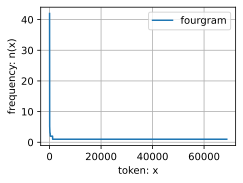

In [12]:
d2l.plot([fourgram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', legend=['fourgram'])

# Outras respostas:

https://pandalab.me/archives/language_models